# <b> 04- Interprétation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly
import sys
import geopy.distance
from collections import defaultdict
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import DistanceMetric
from math import radians
from tqdm import tqdm
tqdm.pandas()
import pickle
import time
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score



import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

plt.rcParams['figure.figsize'] = [15, 10]

import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from xgboost import XGBClassifier

np.random.seed(0)

from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv("../data/data_features.csv", index_col=0)

In [6]:
X = df.drop(['raintomorrow'],axis=1)
y = df['raintomorrow']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

### <b> LR

In [8]:
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
f1_weighted=f1_score(y_test,y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     12240
           1       0.68      0.37      0.48      2302

    accuracy                           0.87     14542
   macro avg       0.79      0.67      0.70     14542
weighted avg       0.86      0.87      0.86     14542



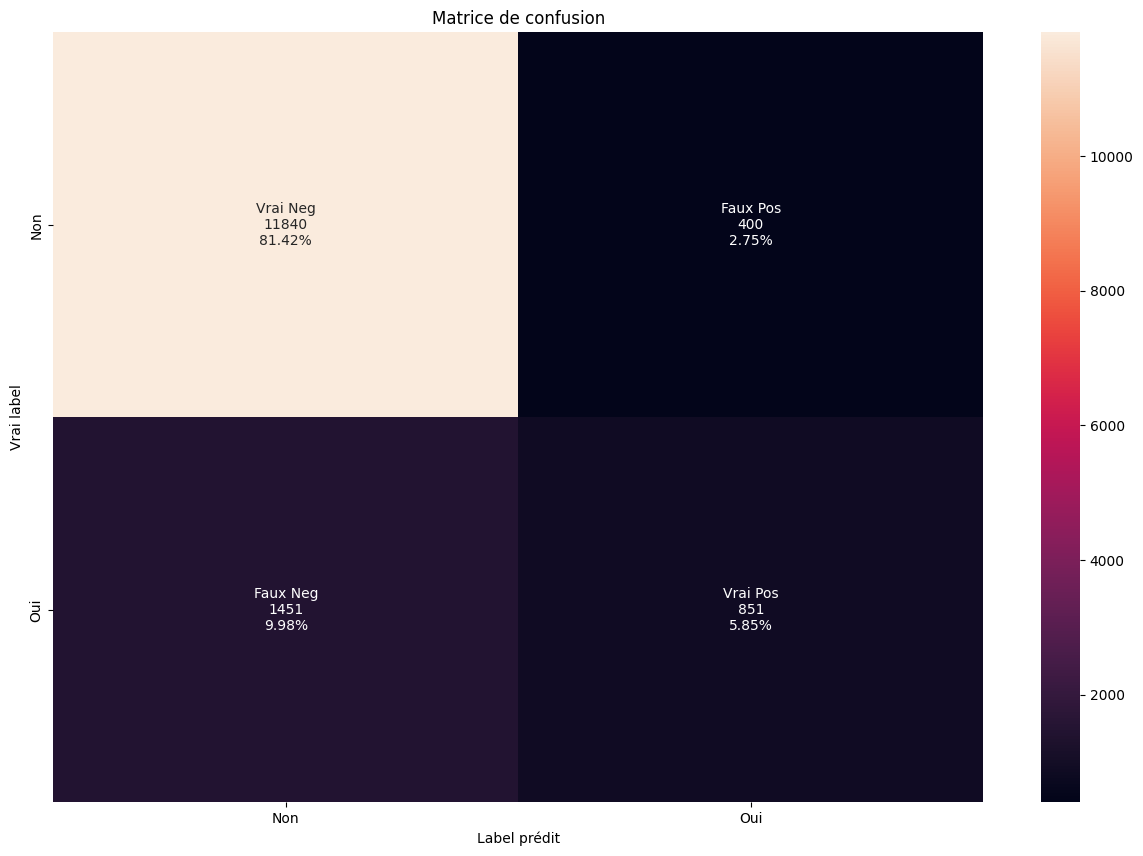

In [9]:
cm = confusion_matrix(y_test,y_pred)

group_names = ['Vrai Neg','Faux Pos','Faux Neg','Vrai Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['Non','Oui']

sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.title('Matrice de confusion')
plt.show()

In [13]:
import statsmodels.api as sm
lr_model=sm.OLS(y,X)
result=lr_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.392     
Dependent Variable:     raintomorrow     AIC:                         36934.5619
Date:                   2023-05-24 23:20 BIC:                         37146.0283
No. Observations:       72707            Log-Likelihood:              -18444.   
Df Model:               23               F-statistic:                 2036.     
Df Residuals:           72684            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.392            Scale:                       0.097276  
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
sunshine            -0.0206      0.0005    -40.9819    0.0000    -0.0216    -0.0196
windgustspeed        0.0079      0.0002  